
# Linear Regression

This notebook walks through a complete, hands-on workflow for Linear
Regression using three small, synthetic datasets related to Novosibirsk:

1. **Rent Prices** — predict apartment rent (₽).
2. **Winter Temperature** — predict average winter temperature (°C).
3. **Energy Consumption** — predict building energy use (kWh) in winter.

**What you'll learn**

- Load and explore data.
- Split into train/test sets.
- Train a Linear Regression model.
- Interpret coefficients and intercept.
- Evaluate with MSE and R².
- Visualize predictions and residuals.


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



## Helper Functions

Small, focused helpers to keep code clean and readable.


In [2]:

def train_test_linear_regression(df, target_col):
    """Train/test split, fit LinearRegression, return trained model and
    evaluation artifacts.

    Args:
        df (pd.DataFrame): Input dataframe with features + target.
        target_col (str): Name of the target column.

    Returns:
        dict: Dictionary of model, feature names, arrays, and metrics.
    """
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        "model": model,
        "features": list(X.columns),
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test,
        "y_pred": y_pred,
        "mse": mse,
        "r2": r2,
    }


In [3]:

def plot_pred_vs_true(y_true, y_pred, title):
    """Scatter plot of predicted vs true values."""
    plt.figure(figsize=(5, 4))
    plt.scatter(y_true, y_pred)
    y_min = min(y_true.min(), y_pred.min())
    y_max = max(y_true.max(), y_pred.max())
    plt.plot([y_min, y_max], [y_min, y_max], linestyle='--')
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    plt.title(title)
    plt.show()


In [4]:

def plot_residuals(y_true, y_pred, title):
    """Histogram of residuals (y_true - y_pred)."""
    residuals = y_true - y_pred
    plt.figure(figsize=(5, 4))
    plt.hist(residuals, bins=15)
    plt.title(title)
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.show()



## 1) Rent Prices in Novosibirsk

**Target:** `rent_price_rub`  
**Features:** `area_m2`, `distance_to_center_km`, `floor`,
`building_age_years`


In [5]:

rent_path = "Data/novosibirsk_rent_prices.csv"
rent_df = pd.read_csv(rent_path)
rent_df.head()


,area_m2,distance_to_center_km,floor,building_age_years,rent_price_rub
0,76,1.28,7,39,34606.0
1,39,8.58,11,2,10000.0
2,96,5.05,3,3,35590.0
3,85,4.56,6,49,35672.0
4,45,9.34,12,37,10000.0


In [6]:

rent_df.describe(include='all')


,area_m2,distance_to_center_km,floor,building_age_years,rent_price_rub
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,61.666667,5.684333,8.500000,22.566667,23845.283333
std,23.789805,2.527537,4.069315,14.710041,11878.766403
min,26.000000,1.130000,1.000000,1.000000,10000.000000
25%,39.000000,3.600000,5.750000,8.500000,10000.000000
50%,67.000000,5.955000,9.000000,22.500000,22924.000000
75%,83.250000,7.512500,12.000000,33.250000,33400.250000
max,99.000000,9.750000,14.000000,49.000000,48894.000000


In [7]:

rent_result = train_test_linear_regression(
    rent_df, target_col="rent_price_rub"
)

print(f"Intercept: {rent_result['model'].intercept_:.2f}")
for name, coef in zip(
    rent_result["features"], rent_result["model"].coef_
):
    print(f"{name:25s} {coef:.2f}")

print(f"MSE: {rent_result['mse']:.2f}")
print(f"R^2: {rent_result['r2']:.3f}")


Intercept: 4441.19
area_m2                   433.91
distance_to_center_km     -1124.58
floor                     63.74
building_age_years        -62.87
MSE: 9295022.48
R^2: 0.930


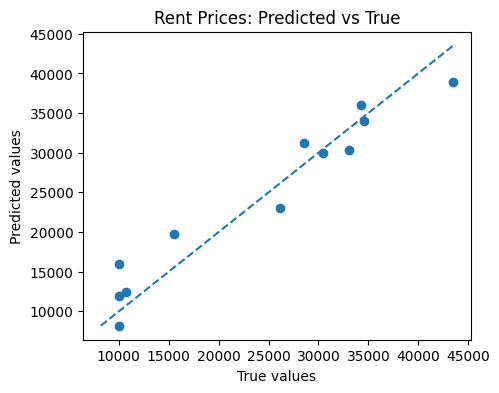

In [8]:

plot_pred_vs_true(
    rent_result["y_test"],
    rent_result["y_pred"],
    "Rent Prices: Predicted vs True",
)


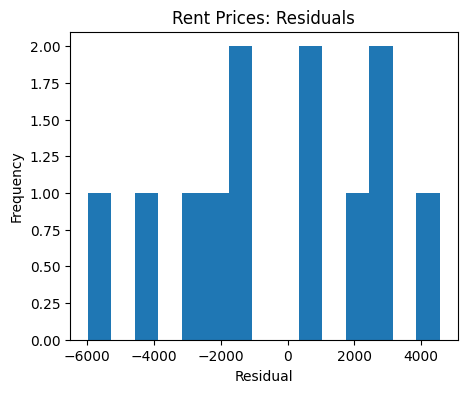

In [9]:

plot_residuals(
    rent_result["y_test"],
    rent_result["y_pred"],
    "Rent Prices: Residuals",
)



## 2) Winter Temperature in Novosibirsk

**Target:** `avg_temp_C`  
**Features:** `altitude_m`, `latitude_deg`, `snow_days`,
`avg_wind_speed_mps`


In [10]:

temp_path = "Data/novosibirsk_temperature.csv"
temp_df = pd.read_csv(temp_path)
temp_df.head()


,altitude_m,latitude_deg,snow_days,avg_wind_speed_mps,avg_temp_C
0,166,54.900,128,5.85,27.2
1,203,54.816,159,3.44,18.6
2,273,54.921,93,7.56,25.8
3,123,55.015,111,1.27,36.2
4,213,54.931,154,3.93,23.7


In [11]:

temp_df.describe(include='all')


,altitude_m,latitude_deg,snow_days,avg_wind_speed_mps,avg_temp_C
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,201.836364,54.968455,106.963636,4.882727,30.536364
std,55.869810,0.117687,30.776352,2.050920,7.216605
min,107.000000,54.807000,60.000000,1.270000,17.000000
25%,156.500000,54.866500,83.000000,3.460000,25.500000
50%,203.000000,54.960000,102.000000,4.930000,32.400000
75%,250.500000,55.069000,133.000000,6.665000,36.250000
max,293.000000,55.192000,159.000000,7.970000,43.200000


In [12]:

temp_result = train_test_linear_regression(
    temp_df, target_col="avg_temp_C"
)

print(f"Intercept: {temp_result['model'].intercept_:.2f}")
for name, coef in zip(
    temp_result["features"], temp_result["model"].coef_
):
    print(f"{name:25s} {coef:.2f}")

print(f"MSE: {temp_result['mse']:.2f}")
print(f"R^2: {temp_result['r2']:.3f}")


Intercept: -116.24
altitude_m                -0.05
latitude_deg              3.33
snow_days                 -0.21
avg_wind_speed_mps        -0.87
MSE: 8.95
R^2: 0.634


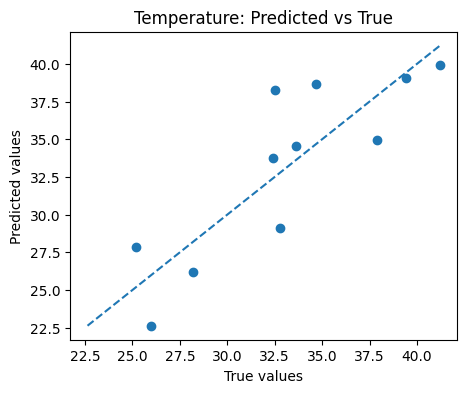

In [13]:

plot_pred_vs_true(
    temp_result["y_test"],
    temp_result["y_pred"],
    "Temperature: Predicted vs True",
)


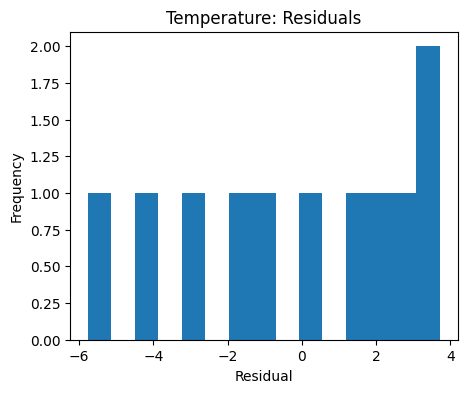

In [14]:

plot_residuals(
    temp_result["y_test"],
    temp_result["y_pred"],
    "Temperature: Residuals",
)



## 3) Winter Energy Consumption in Novosibirsk

**Target:** `energy_consumption_kWh`  
**Features:** `temp_outside_C`, `building_size_m2`,
`insulation_quality`, `num_occupants`


In [15]:

energy_path = "Data/novosibirsk_energy_consumption.csv"
energy_df = pd.read_csv(energy_path)
energy_df.head()


,temp_outside_C,building_size_m2,insulation_quality,num_occupants,energy_consumption_kWh
0,-21.6,1219,0.64,1,1401.0
1,-17.7,741,0.73,4,1531.0
2,-11.9,958,0.56,7,1283.0
3,-21.9,1329,0.62,1,1898.0
4,-26.0,280,0.82,2,412.0


In [16]:

energy_df.describe(include='all')


,temp_outside_C,building_size_m2,insulation_quality,num_occupants,energy_consumption_kWh
count,70.000000,70.000000,70.000000,70.000000,70.000000
mean,-14.874286,785.442857,0.616714,3.914286,1127.600000
std,8.681443,397.039612,0.185603,1.946702,711.564054
min,-29.600000,207.000000,0.310000,1.000000,-159.000000
25%,-21.900000,406.250000,0.470000,2.000000,595.250000
50%,-13.800000,828.500000,0.600000,4.000000,1086.500000
75%,-7.350000,1099.000000,0.727500,5.750000,1588.000000
max,-0.400000,1480.000000,0.990000,7.000000,3022.000000


In [17]:

energy_result = train_test_linear_regression(
    energy_df, target_col="energy_consumption_kWh"
)

print(f"Intercept: {energy_result['model'].intercept_:.2f}")
for name, coef in zip(
    energy_result["features"], energy_result["model"].coef_
):
    print(f"{name:25s} {coef:.2f}")

print(f"MSE: {energy_result['mse']:.2f}")
print(f"R^2: {energy_result['r2']:.3f}")


Intercept: 345.56
temp_outside_C            -44.19
building_size_m2          0.57
insulation_quality        -440.97
num_occupants             -9.20
MSE: 444828.03
R^2: 0.373


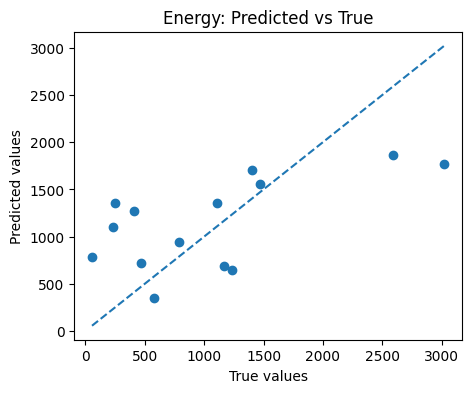

In [18]:

plot_pred_vs_true(
    energy_result["y_test"],
    energy_result["y_pred"],
    "Energy: Predicted vs True",
)


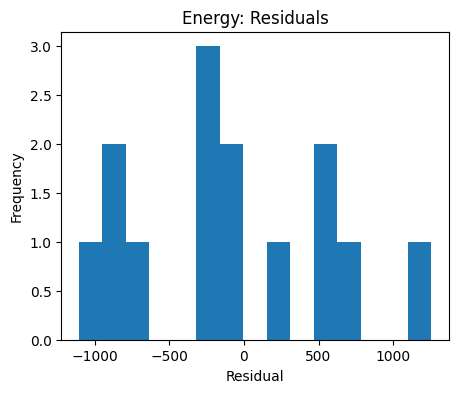

In [19]:

plot_residuals(
    energy_result["y_test"],
    energy_result["y_pred"],
    "Energy: Residuals",
)



## Summary

- Linear Regression finds coefficients that best fit the training data.
- Always check metrics (MSE, R²) and inspect residuals.
- Interpret coefficients carefully, considering feature units.
- Use Linear Regression as a strong baseline before more complex models.
